## Sensor Finding

Sensor finding will be done using normalized cross-correlation on a predetermined sensor kernel
The window kernel will be calibrated from the UI.

In [1]:
import numpy as np
import cv2
from skimage.io import imread, imshow
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import scipy

Load the images

In [2]:
input_image = imread('pic2.jpeg', as_gray=True)
kernel_image = imread("kernel.jpeg", as_gray=True)

Normalize the images

In [16]:
norm_a = np.linalg.norm(input_image)
a = input_image / norm_a
norm_b = np.linalg.norm(kernel_image)
b = kernel_image / norm_b
b -= b.mean()
a -= a.mean()

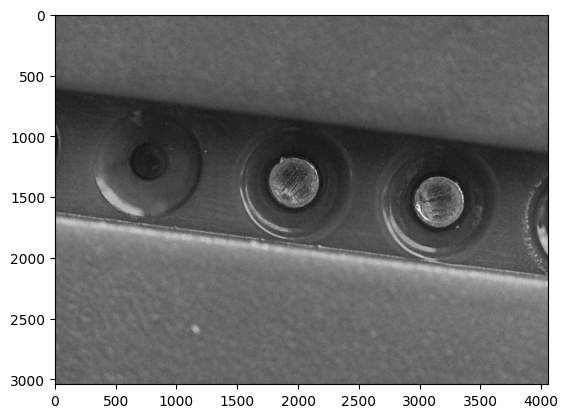

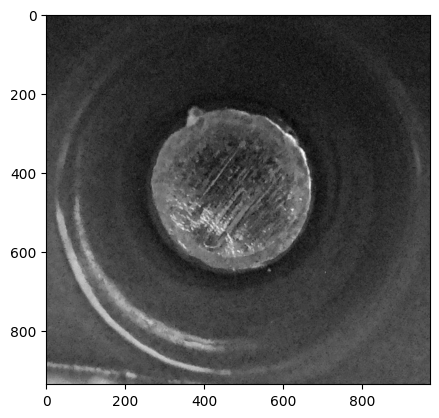

In [28]:
plt.figure(1)
plt.imshow(a, cmap='gray')
plt.figure(2)
plt.imshow(b, cmap='gray')

Perform the cross correlation in Fourier space

In [6]:
a_ft = np.fft.fftshift(scipy.fftpack.fft2(input_image))
b_ft = np.fft.fftshift(scipy.fftpack.fft2(kernel_image))

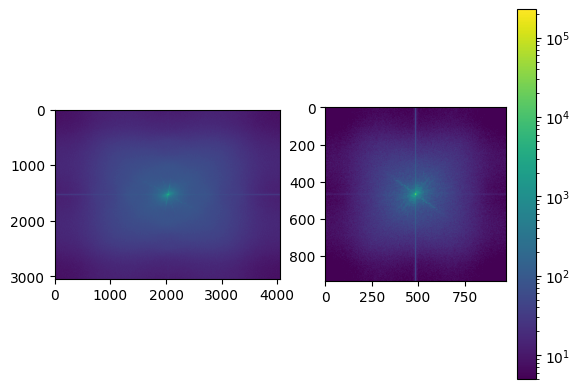

In [7]:
plt.subplot(1, 2, 1)
plt.imshow(np.abs(a_ft), norm=LogNorm(vmin=5))
plt.subplot(1, 2, 2)
plt.imshow(np.abs(b_ft), norm=LogNorm(vmin=5))
plt.colorbar()

In [21]:
ft_corr = scipy.signal.fftconvolve(a, b.transpose())

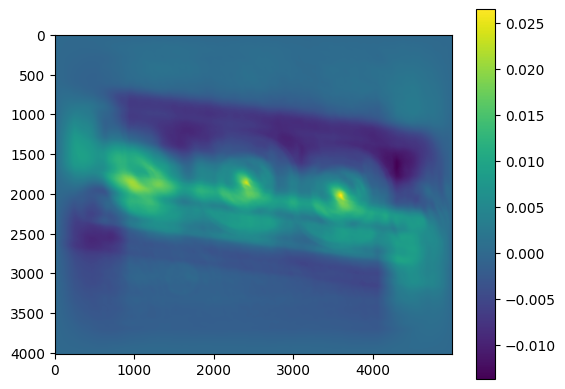

In [22]:
plt.imshow(ft_corr)
plt.colorbar()

In [26]:
peaks = ft_corr.copy()
peaks[peaks < 0.85 * peaks.max()] = 0

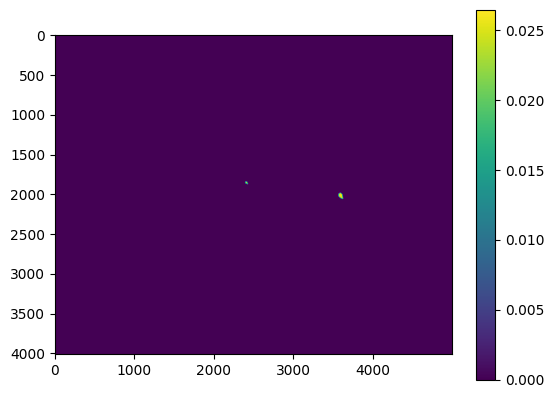

In [27]:
plt.imshow(peaks)
plt.colorbar()